### 1. Let’s attempt to predict the survival of a horse based on various observed medical conditions. Load the data from ‘horses.csv’ and observe whether it contains missing values.
[Hint: Pandas dataframe has a method isnull]
### 2. This dataset contains many categorical features, replace them with label encoding.
[Hint: Refer to get_dummies methods in pandas dataframe or Label encoder in scikit-learn]
### 3. Replace the missing values by the most frequent value in each column.
[Hint: Refer to Imputer class in Scikit learn preprocessing module]
### 4. Fit a decision tree classifier and observe the accuracy.
### 5. Fit a random forest classifier and observe the accuracy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfhorses = pd.read_csv('horse.csv')

In [4]:
dfhorses.shape

(299, 28)

In [5]:
dfhorses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [6]:
dfhorses.sample(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
25,no,adult,529518,37.8,60.0,42.0,NaN,NaN,NaN,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
280,no,adult,530624,40.0,78.0,NaN,cool,reduced,bright_red,less_3_sec,...,66.0,6.5,NaN,NaN,died,yes,8400,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,...,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no
187,yes,adult,533887,38.5,60.0,NaN,normal,normal,NaN,less_3_sec,...,33.0,53.0,clear,NaN,lived,yes,4111,0,0,no
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
270,yes,adult,534626,37.7,80.0,NaN,cool,reduced,dark_cyanotic,less_3_sec,...,50.0,55.0,serosanguious,2.0,lived,yes,4206,0,0,no
121,yes,adult,534556,38.3,80.0,40.0,NaN,NaN,dark_cyanotic,more_3_sec,...,67.0,10.2,cloudy,1.0,euthanized,yes,2208,0,0,no
256,yes,adult,529812,38.7,96.0,28.0,cool,reduced,pale_cyanotic,less_3_sec,...,64.0,9.0,NaN,NaN,died,yes,2205,0,0,yes
250,no,adult,527940,36.6,42.0,18.0,cool,reduced,bright_pink,less_3_sec,...,52.0,7.1,NaN,NaN,died,yes,5111,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes


In [7]:
dfhorses.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [8]:
dfhorses.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [9]:
dfhorses['rectal_temp'].fillna(dfhorses['rectal_temp'].mean(), inplace= True)

In [10]:
dfhorses.count()

surgery                  299
age                      299
hospital_number          299
rectal_temp              299
pulse                    275
respiratory_rate         241
temp_of_extremities      243
peripheral_pulse         230
mucous_membrane          252
capillary_refill_time    267
pain                     244
peristalsis              255
abdominal_distention     243
nasogastric_tube         195
nasogastric_reflux       193
nasogastric_reflux_ph     53
rectal_exam_feces        197
abdomen                  181
packed_cell_volume       270
total_protein            266
abdomo_appearance        134
abdomo_protein           101
outcome                  299
surgical_lesion          299
lesion_1                 299
lesion_2                 299
lesion_3                 299
cp_data                  299
dtype: int64

In [11]:
dfhorses.pulse.fillna(dfhorses.pulse.mean(), inplace = True)

In [12]:
dfhorses.count()

surgery                  299
age                      299
hospital_number          299
rectal_temp              299
pulse                    299
respiratory_rate         241
temp_of_extremities      243
peripheral_pulse         230
mucous_membrane          252
capillary_refill_time    267
pain                     244
peristalsis              255
abdominal_distention     243
nasogastric_tube         195
nasogastric_reflux       193
nasogastric_reflux_ph     53
rectal_exam_feces        197
abdomen                  181
packed_cell_volume       270
total_protein            266
abdomo_appearance        134
abdomo_protein           101
outcome                  299
surgical_lesion          299
lesion_1                 299
lesion_2                 299
lesion_3                 299
cp_data                  299
dtype: int64

In [13]:
dfhorses.temp_of_extremities.unique()

array(['cool', nan, 'normal', 'cold', 'warm'], dtype=object)

In [14]:
dfhorses.respiratory_rate.fillna(dfhorses.respiratory_rate.mean(), inplace = True)

In [15]:
dfhorses.pain.unique()

array(['extreme_pain', 'mild_pain', 'depressed', nan, 'severe_pain',
       'alert'], dtype=object)

In [16]:
dfhorses.sample(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
256,yes,adult,529812,38.700000,96.0,28.000000,cool,reduced,pale_cyanotic,less_3_sec,...,64.0,9.0,NaN,NaN,died,yes,2205,0,0,yes
59,no,adult,528904,38.168619,96.0,30.460581,cool,reduced,pale_pink,more_3_sec,...,60.0,NaN,NaN,NaN,died,yes,4205,0,0,no
218,yes,adult,529736,38.168619,52.0,28.000000,cool,reduced,pale_cyanotic,less_3_sec,...,37.0,8.1,NaN,NaN,lived,yes,2111,0,0,no
249,yes,adult,535043,39.300000,100.0,51.000000,cold,absent,dark_cyanotic,less_3_sec,...,66.0,13.0,serosanguious,2.0,euthanized,yes,2113,0,0,no
246,yes,adult,530170,38.100000,88.0,24.000000,cool,reduced,pale_cyanotic,less_3_sec,...,41.0,4.6,NaN,NaN,died,yes,2209,0,0,no
283,no,adult,530439,38.500000,54.0,30.460581,normal,normal,normal_pink,less_3_sec,...,40.0,6.8,cloudy,7.0,lived,no,0,0,0,yes
276,no,adult,528620,36.900000,50.0,40.000000,warm,reduced,pale_pink,less_3_sec,...,37.5,6.5,NaN,NaN,lived,no,3111,0,0,no
81,yes,adult,534756,37.300000,40.0,30.460581,NaN,reduced,normal_pink,less_3_sec,...,36.0,NaN,serosanguious,2.0,lived,yes,3111,0,0,no
263,yes,adult,530478,38.300000,44.0,21.000000,cool,normal,bright_pink,less_3_sec,...,44.0,6.5,cloudy,4.4,lived,yes,2209,0,0,yes
11,no,adult,527927,39.100000,72.0,52.000000,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no


In [17]:
dfhorses.pain.fillna('mild_pain',inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
dfhorses['pain']=le.fit_transform(dfhorses['pain'].astype('str'))


In [20]:
dfhorses.pain.unique()

array([2, 3, 1, 4, 0], dtype=int64)

In [21]:
dfhorses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              299 non-null float64
pulse                    299 non-null float64
respiratory_rate         299 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     299 non-null int32
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null 

In [22]:
dfhorses['age']=le.fit_transform(dfhorses['age'].astype('str'))

In [23]:
dfhorses['surgery']=le.fit_transform(dfhorses['surgery'].astype('str'))

In [24]:
dfhorses.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,1,0,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,0,0,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,1,1,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,0,0,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [25]:
dfhorses.drop('hospital_number',axis=1,inplace=True)

In [26]:
dfhorses['peristalsis']=le.fit_transform(dfhorses['peristalsis'].astype('str'))

In [27]:
dfhorses['peristalsis'].unique()

array([0, 2, 3, 1, 4], dtype=int64)

In [28]:
dfhorses['temp_of_extremities'].unique()

array(['cool', nan, 'normal', 'cold', 'warm'], dtype=object)

In [29]:
dfhorses['temp_of_extremities']=le.fit_transform(dfhorses['temp_of_extremities'].astype(str))

In [30]:
dfhorses['temp_of_extremities'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [31]:
dfhorses['peripheral_pulse'].fillna('normal',inplace=True)

In [32]:
dfhorses['peripheral_pulse']=le.fit_transform(dfhorses['peripheral_pulse'].astype('str'))

In [33]:
dfhorses['mucous_membrane'].unique()

array([nan, 'pale_cyanotic', 'pale_pink', 'dark_cyanotic', 'normal_pink',
       'bright_red', 'bright_pink'], dtype=object)

In [34]:
dfhorses['mucous_membrane']=le.fit_transform(dfhorses['mucous_membrane'].astype('str'))

In [35]:
dfhorses['capillary_refill_time'].unique()

array(['more_3_sec', 'less_3_sec', nan, '3'], dtype=object)

In [36]:
dfhorses['capillary_refill_time']=le.fit_transform(dfhorses['capillary_refill_time'].astype('str'))

In [37]:
dfhorses['packed_cell_volume'].isna().count()

299

In [38]:
dfhorses['total_protein'].isna().count()

299

In [39]:
dfhorses['abdomo_protein'].fillna(dfhorses['abdomo_protein'].mean(),inplace = True)

In [40]:
dfhorses['abdomo_protein'] = le.fit_transform(dfhorses['abdomo_protein'].astype('str'))

In [41]:
dfhorses.sample(5)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
49,0,0,37.2,84.0,48.0,1,3,1,2,4,...,73.0,5.5,cloudy,24,died,no,4300,0,0,yes
243,1,1,38.2,124.0,88.0,3,3,0,1,1,...,47.0,8.0,clear,17,lived,yes,9400,0,0,yes
25,0,0,37.8,60.0,42.0,2,2,3,1,3,...,NaN,NaN,NaN,17,lived,no,0,0,0,no
216,1,0,38.0,76.0,18.0,2,2,3,2,3,...,71.0,11.0,NaN,17,lived,yes,2209,0,0,yes
227,1,0,37.3,90.0,40.0,1,2,2,2,2,...,65.0,50.0,serosanguious,8,euthanized,yes,3205,0,0,no


In [42]:
dfhorses.drop('abdomo_appearance',axis = 1, inplace=True)

In [43]:
dfhorses.outcome.isna().count()

299

In [44]:
#labelEncoding
dfhorses['outcome'] =le.fit_transform(dfhorses['outcome'].astype('str'))

In [45]:
dfhorses.outcome.unique()

array([0, 1, 2], dtype=int64)

In [46]:
dfhorses.drop(['lesion_1','lesion_2','lesion_3'],axis=1,inplace=True)

In [47]:
dfhorses.isna().sum()

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_protein             0
outcome                    0
surgical_lesion            0
cp_data                    0
dtype: int64

In [48]:
dfhorses.drop('nasogastric_reflux_ph',axis=1,inplace=True)

In [49]:
dfhorses.drop(['nasogastric_tube','nasogastric_reflux','rectal_exam_feces','abdomen'],axis=1,inplace=True)

In [50]:
dfhorses.isna().sum()

surgery                   0
age                       0
rectal_temp               0
pulse                     0
respiratory_rate          0
temp_of_extremities       0
peripheral_pulse          0
mucous_membrane           0
capillary_refill_time     0
pain                      0
peristalsis               0
abdominal_distention     56
packed_cell_volume       29
total_protein            33
abdomo_protein            0
outcome                   0
surgical_lesion           0
cp_data                   0
dtype: int64

In [51]:
dfhorses[['abdominal_distention','packed_cell_volume','total_protein']].sample(10)

,abdominal_distention,packed_cell_volume,total_protein
267,NaN,47.0,60.0
229,severe,NaN,NaN
95,moderate,41.0,69.0
20,severe,46.0,6.1
121,none,67.0,10.2
47,none,37.0,6.5
199,moderate,40.0,6.6
159,NaN,35.0,58.0
64,slight,44.0,7.5
29,none,45.0,76.0


In [52]:
dfhorses.drop('abdominal_distention',axis=1,inplace=True)

In [53]:
dfhorses['packed_cell_volume'].fillna(dfhorses['packed_cell_volume'].mean(),inplace=True)

In [54]:
dfhorses['packed_cell_volume'].unique()

array([45.        , 50.        , 33.        , 48.        , 74.        ,
       46.30740741, 37.        , 44.        , 38.        , 40.        ,
       46.        , 53.        , 55.        , 49.        , 51.        ,
       43.        , 66.        , 52.        , 73.        , 56.        ,
       32.        , 63.        , 47.        , 57.        , 60.        ,
       65.        , 54.        , 41.        , 24.        , 42.        ,
       64.        , 26.        , 58.        , 69.        , 36.        ,
       68.        , 59.        , 34.        , 39.        , 67.        ,
       31.        , 75.        , 35.        , 30.        , 23.        ,
       70.        , 71.        , 31.5       , 72.        , 37.5       ,
       28.        ])

In [55]:
dfhorses['total_protein'].fillna(dfhorses['total_protein'].mean(),inplace=True)

In [56]:
dfhorses.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64

In [57]:
dfhorses.corr()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,packed_cell_volume,total_protein,abdomo_protein,outcome
surgery,1.000000,0.089319,-0.036601,0.179646,0.181173,-0.154537,0.115915,0.016266,0.106110,0.228871,-0.049557,0.040038,0.042420,-0.080287,-0.189222
age,0.089319,1.000000,0.179149,0.507224,0.375469,0.020199,0.027843,-0.189479,0.102766,0.058242,0.029284,-0.144326,-0.112925,-0.008288,-0.101782
rectal_temp,-0.036601,0.179149,1.000000,0.201133,0.239180,-0.062420,0.012756,-0.156177,0.101773,-0.109700,-0.086449,0.056158,-0.053487,0.092602,0.016683
pulse,0.179646,0.507224,0.201133,1.000000,0.439825,-0.311252,0.247265,-0.084270,0.219104,0.125354,-0.279160,0.369850,-0.079947,0.020620,-0.344670
respiratory_rate,0.181173,0.375469,0.239180,0.439825,1.000000,-0.026533,0.132643,-0.098538,0.060434,0.097621,-0.077225,0.073790,-0.077715,0.000232,-0.079408
temp_of_extremities,-0.154537,0.020199,-0.062420,-0.311252,-0.026533,1.000000,-0.251839,-0.064236,-0.221903,-0.149568,0.215106,-0.329175,0.035589,0.002806,0.321871
peripheral_pulse,0.115915,0.027843,0.012756,0.247265,0.132643,-0.251839,1.000000,0.076487,0.043325,0.062531,-0.254411,0.239227,-0.038235,0.081387,-0.165719
mucous_membrane,0.016266,-0.189479,-0.156177,-0.084270,-0.098538,-0.064236,0.076487,1.000000,-0.120495,0.110642,-0.164402,-0.169852,-0.010676,0.023588,0.091284
capillary_refill_time,0.106110,0.102766,0.101773,0.219104,0.060434,-0.221903,0.043325,-0.120495,1.000000,0.156243,0.050472,0.231612,0.014278,0.006136,-0.187680
pain,0.228871,0.058242,-0.109700,0.125354,0.097621,-0.149568,0.062531,0.110642,0.156243,1.000000,0.020661,0.025235,-0.075915,-0.075034,-0.161964


In [58]:
dfhorses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 17 columns):
surgery                  299 non-null int32
age                      299 non-null int32
rectal_temp              299 non-null float64
pulse                    299 non-null float64
respiratory_rate         299 non-null float64
temp_of_extremities      299 non-null int32
peripheral_pulse         299 non-null int32
mucous_membrane          299 non-null int32
capillary_refill_time    299 non-null int32
pain                     299 non-null int32
peristalsis              299 non-null int32
packed_cell_volume       299 non-null float64
total_protein            299 non-null float64
abdomo_protein           299 non-null int32
outcome                  299 non-null int32
surgical_lesion          299 non-null object
cp_data                  299 non-null object
dtypes: float64(5), int32(10), object(2)
memory usage: 28.1+ KB


In [59]:
dfhorses.surgical_lesion.unique()

array(['no', 'yes'], dtype=object)

In [60]:
dfhorses['surgical_lesion']=le.fit_transform(dfhorses['surgical_lesion'].astype('str'))

In [61]:
dfhorses['cp_data'].unique()

array(['no', 'yes'], dtype=object)

In [62]:
dfhorses['cp_data']= le.fit_transform(dfhorses['cp_data'].astype('str'))

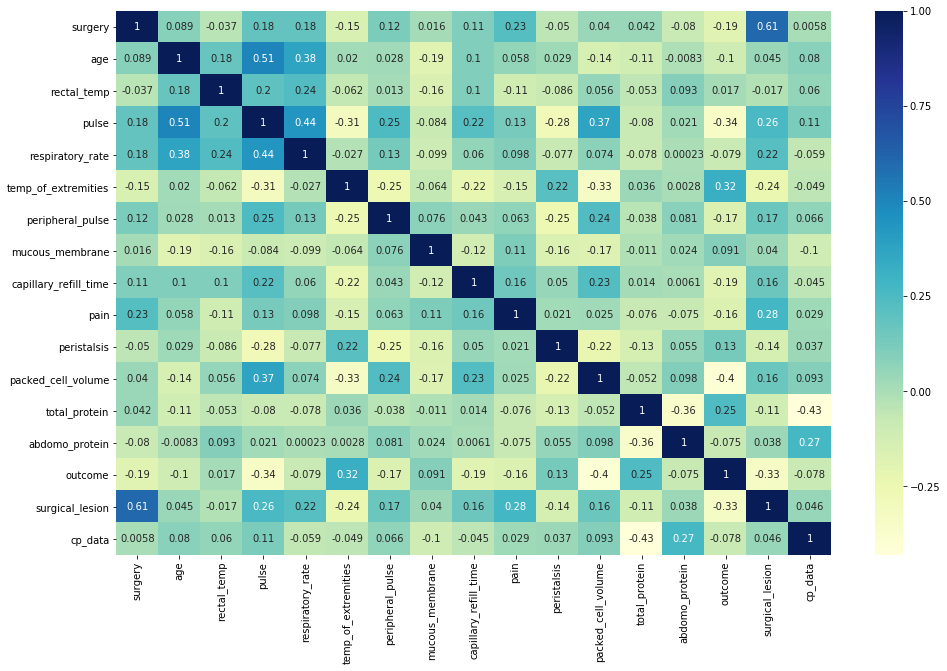

In [88]:
plt.figure(figsize=(16,10))
sns.heatmap(dfhorses.corr(),annot=True, cmap='YlGnBu')

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
#X = dfhorses[['pulse','temp_of_extremities','total_protein','packed_cell_volume','surgical_lesion']]

In [66]:
X= dfhorses.drop('outcome',axis = 1)

In [67]:
X.sample(5)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,cp_data
165,1,0,38.300000,40.0,18.000000,3,2,4,1,3,1,43.0,5.9,17,0,1
56,1,0,38.168619,72.0,30.460581,2,2,3,3,3,3,24.0,6.7,17,1,0
0,0,0,38.500000,66.0,28.000000,1,3,3,2,2,0,45.0,8.4,17,0,0
181,1,0,38.000000,72.0,24.000000,1,3,2,2,2,3,68.0,7.8,17,1,0
280,0,0,40.000000,78.0,30.460581,1,3,1,1,1,2,66.0,6.5,17,1,1


In [68]:
y = dfhorses.outcome

In [69]:
y.unique()

array([0, 1, 2], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [72]:
X_train.shape

(224, 16)

In [73]:
X_test.shape

(75, 16)

In [74]:
y_test.shape

(75,)

In [75]:
y_train.shape

(224,)

In [76]:
dtc = DecisionTreeClassifier()

In [77]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
pred_y = dtc.predict(X_test)

In [79]:
newdf = pd.DataFrame({"Test":y_test,"Prediction":pred_y})
newdf

,Test,Prediction
291,0,2
180,2,2
137,2,2
277,2,2
205,2,2
30,0,0
58,0,0
6,2,2
43,1,2
206,0,0


In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test,pred_y)

0.68

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier(n_estimators=98)

In [84]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=98, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
rfcprediction = rfc.predict(X_test)

In [86]:
accuracy_score(y_test,rfcprediction)

0.7333333333333333

In [87]:
newdf1 = pd.DataFrame({"Test":y_test,"Prediction":rfcprediction})
newdf1

,Test,Prediction
291,0,2
180,2,2
137,2,2
277,2,2
205,2,2
30,0,0
58,0,0
6,2,2
43,1,2
206,0,2
